In [2]:
from natsort import natsorted
import glob
import os
import pickle
import matplotlib.pyplot as plt
#natsorted to sort based on integers of the file name, glob to take all the files that match a condition

In [3]:
image_paths = natsorted(glob.glob('data/images/test/*/*'))
#prints a list of sorted names of all the documents
# print(image_paths)
clsname_to_idx={}
idxname_to_class={ }
for idx, item in enumerate((image_paths), start=0):
    clsn=os.path.basename(item)
    clsname_to_idx[clsn]=idx
    idxname_to_class[idx]=clsn
#create a dictionary with paths as value and class labels as key 
img_dict={ }
for paths in image_paths:
    # print(paths)
    class_name=paths.split(os.path.sep)[-2]
    if class_name in img_dict:
        img_dict[class_name].append(paths)
    else:
        img_dict[class_name]=[paths]
# print(img_dict)

FOR REFERENCE TO TUTTU-----

os.environ['TF_XLA_FLAGS'] = '--tf_xla_enable_xla_devices': This line sets the environment variable TF_XLA_FLAGS to the value --tf_xla_enable_xla_devices. This is used to enable XLA (Accelerated Linear Algebra) devices in TensorFlow, which can help improve performance on some models.

os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID": This line sets the environment variable CUDA_DEVICE_ORDER to the value PCI_BUS_ID. This variable determines the order in which CUDA devices (GPUs) are enumerated. Setting it to PCI_BUS_ID means that the GPUs will be ordered by their PCI bus IDs.

os.environ["CUDA_VISIBLE_DEVICES"] = '1': This line sets the environment variable CUDA_VISIBLE_DEVICES to the value 1. This variable restricts the CUDA devices that are visible to the application. In this case, it restricts the application to only use the GPU with index 1.



In [4]:
# environment variable setup
os.environ['TF_XLA_FLAGS'] = '--tf_xla_enable_xla_devices'
os.environ["CUDA_DEVICE_ORDER"]= "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]= '1'

In [5]:
n_channels  = 14
n_feat      = 128
batch_size  = 128
test_batch_size  = 1
n_classes   = 10

In [6]:
with open('data/eeg/image/data.pkl', 'rb') as file:
        data = pickle.load(file, encoding='latin1')
        train_X = data['x_train']
        train_Y = data['y_train']
        test_X = data['x_test']
        test_Y = data['y_test']

print(train_X.shape, train_Y.shape, test_X.shape, test_Y.shape)

(45390, 14, 32, 1) (45390, 10) (5706, 14, 32, 1) (5706, 10)


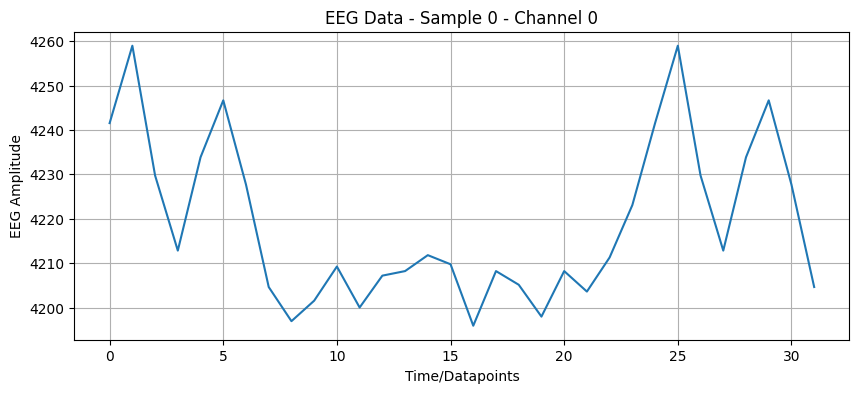

In [7]:
# Assuming you want to visualize the first sample (0) and the first channel (0)
sample = 0
channel = 0

# Get the data for the chosen sample and channel
eeg_data = train_X[sample, channel]

# Create a time axis for the data
time_axis = range(len(eeg_data))

# Plot EEG data
plt.figure(figsize=(10, 4))
plt.plot(time_axis, eeg_data)
plt.title('EEG Data - Sample {} - Channel {}'.format(sample, channel))
plt.xlabel('Time/Datapoints')
plt.ylabel('EEG Amplitude')
plt.grid(True)
plt.show()

 The y-axis in EEG data is often referred to as "EEG amplitude" because it represents the magnitude or amplitude of the recorded voltage. x axis represent the 32 datapoints in channel 0 [each channel  have 32 data points]

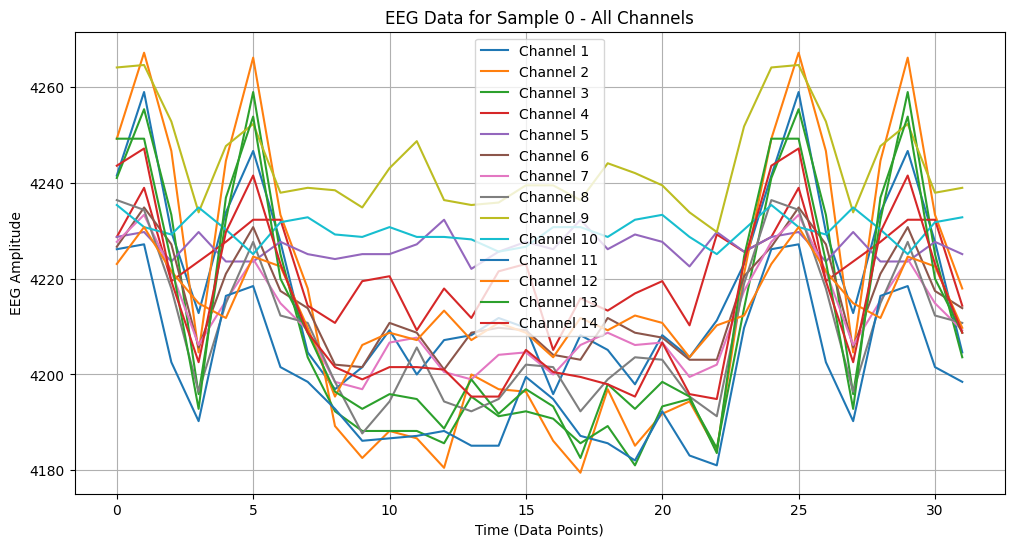

In [8]:
# Sample number (0 in this case)
sample = 0

# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(12, 6))

# Plot each channel's EEG data on the same graph
for channel in range(14):
    ax.plot(train_X[sample, channel].flatten(), label=f'Channel {channel + 1}')

# Labeling and legends
ax.set_xlabel('Time (Data Points)')
ax.set_ylabel('EEG Amplitude')
ax.set_title(f'EEG Data for Sample 0 - All Channels')
ax.legend()
ax.grid(True)

plt.show()


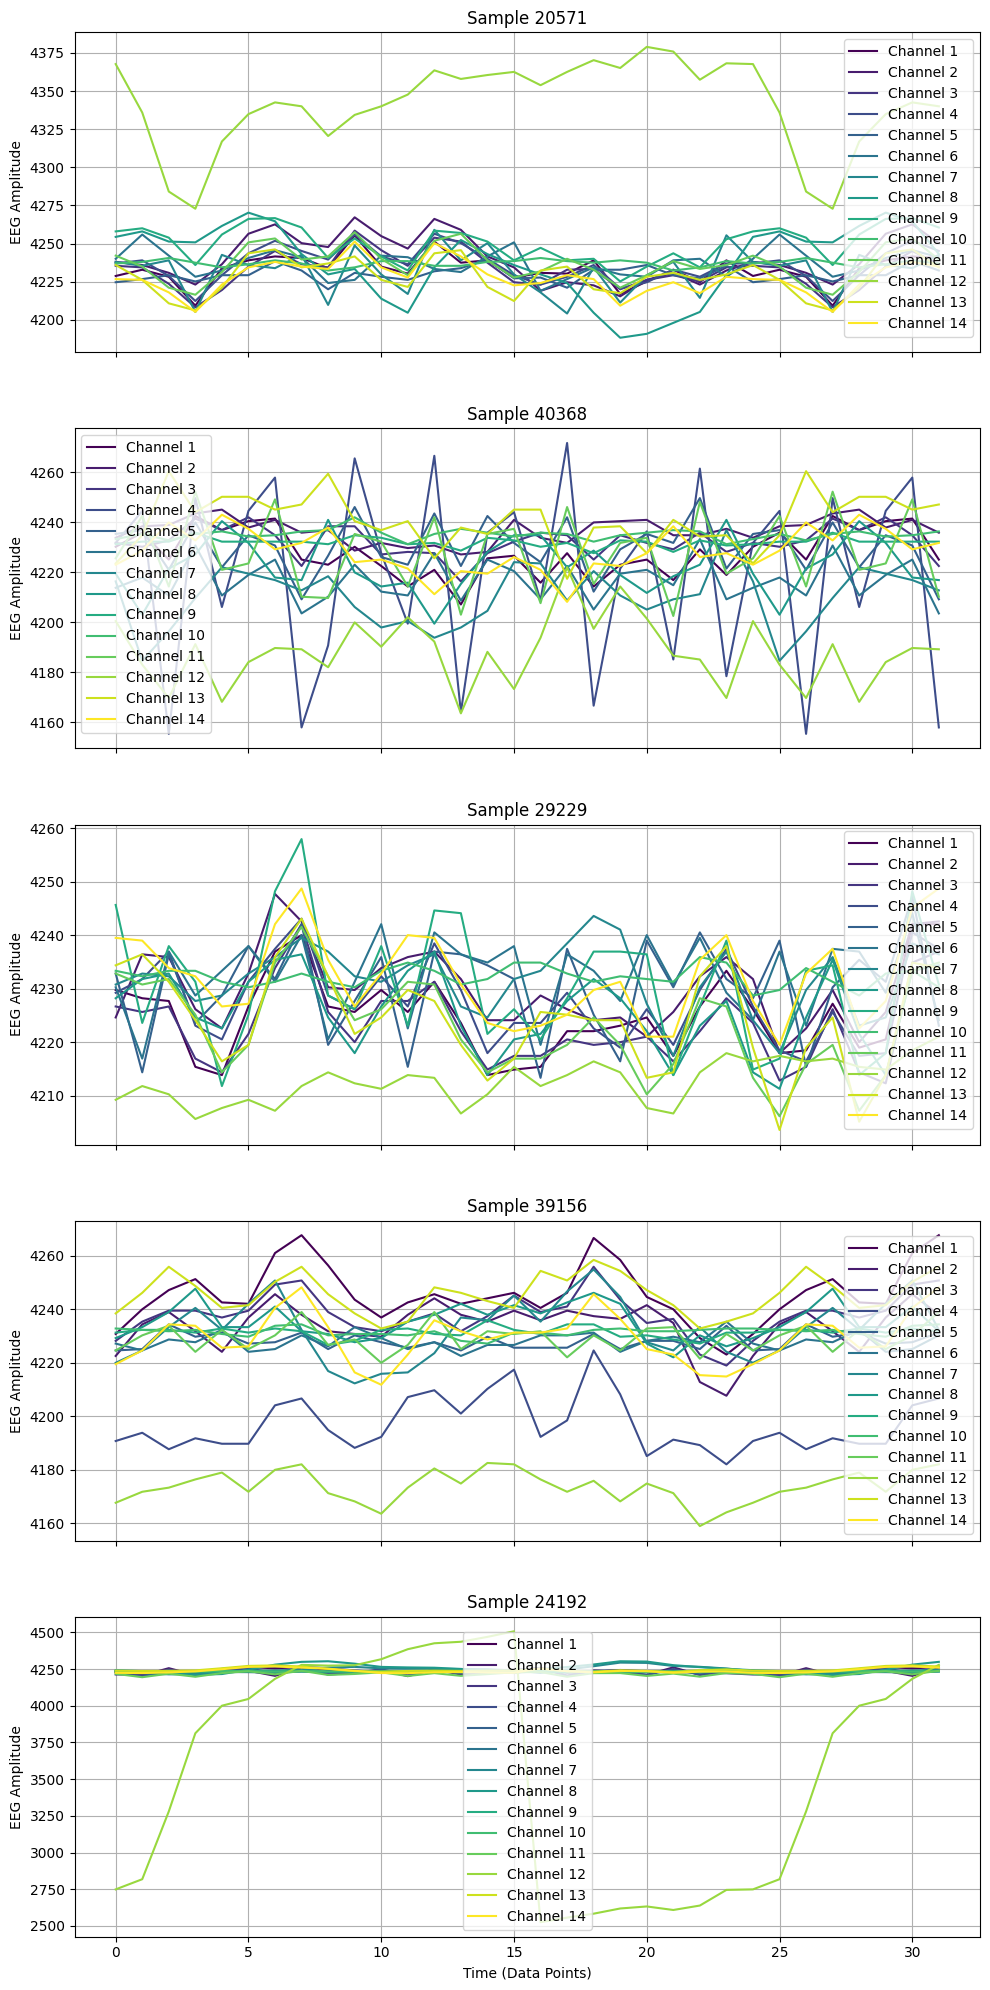

In [9]:
import random
import numpy as np

# Number of random samples to visualize
num_samples_to_visualize = 5

# Randomly select 10 sample indices
sample_indices = random.sample(range(train_X.shape[0]), num_samples_to_visualize)

# Create a color map for different channels
colors = plt.cm.viridis(np.linspace(0, 1, 14))

# Create a figure with subplots
fig, axes = plt.subplots(num_samples_to_visualize, 1, figsize=(10, 4*num_samples_to_visualize), sharex=True)

# Loop through the randomly selected samples
for i, sample in enumerate(sample_indices):
    ax = axes[i]
    for channel in range(14):
        ax.plot(train_X[sample, channel].flatten(), color=colors[channel], label=f'Channel {channel + 1}')

    ax.set_title(f'Sample {sample}')
    ax.set_ylabel('EEG Amplitude')
    ax.grid(True)
    ax.legend()

plt.xlabel('Time (Data Points)')
plt.tight_layout()
plt.show()


In [10]:
sample_index=10
labels_for_sample = train_Y[sample_index]
print("Labels for Sample", sample_index, ":", labels_for_sample)

Labels for Sample 10 : [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
